## **CNN with Fashion MNIST data set**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train sahpe:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train sahpe: (60000, 28, 28)


In [4]:
# data is only 2D
# convolution expects height x width x color so, 3D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model with Keras Functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i) 
x = Conv2D(64, (3,3), strides=2, activation='relu')(x) 
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# compile and fit
# use GPU for this

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5304 - accuracy: 0.8037 - val_loss: 0.4154 - val_accuracy: 0.8410
Epoch 2/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3697 - accuracy: 0.8612 - val_loss: 0.3376 - val_accuracy: 0.8732
Epoch 3/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3168 - accuracy: 0.8810 - val_loss: 0.3446 - val_accuracy: 0.8688
Epoch 4/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2844 - accuracy: 0.8938 - val_loss: 0.3114 - val_accuracy: 0.8847
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2575 - accuracy: 0.9036 - val_loss: 0.3091 - val_accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2345 - accuracy: 0.9112 - val_loss: 0.2979 - val_accuracy: 0.8962
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2175 - accuracy: 0.9180 - val_loss: 0.3046 -

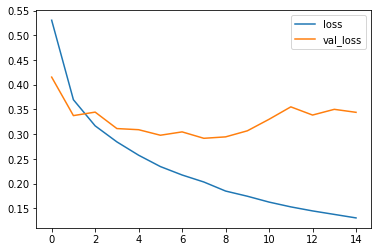

In [10]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

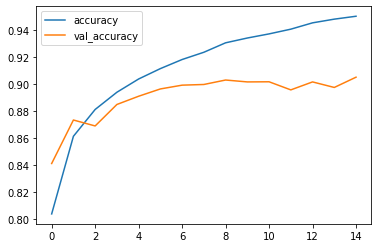

In [11]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion confusion matrix, w/o normalization
[[887   1  23  14   2   2  63   0   8   0]
 [  1 978   1  11   2   0   5   0   2   0]
 [ 11   0 885   9  42   0  51   0   2   0]
 [ 18   8  19 911  18   1  24   0   1   0]
 [  1   0  69  31 821   0  76   0   2   0]
 [  0   0   0   0   0 981   0  10   2   7]
 [128   1  75  22  71   0 693   0  10   0]
 [  0   0   0   0   0  18   0 956   0  26]
 [  2   2   4   3   2   3   5   2 977   0]
 [  0   0   0   0   0   8   1  31   0 960]]


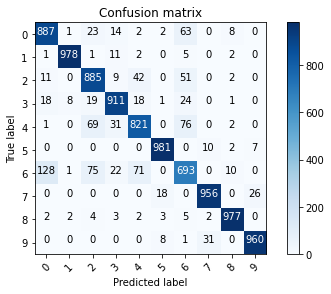

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion confusion matrix, w/o normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [19]:
# labels
labels = '''T-shirt/top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankleboot'''.split()


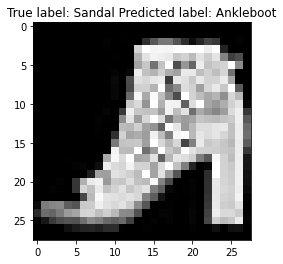

In [27]:
# show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted label: %s" % (labels[y_test[i]],labels[p_test[i]]));